In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm #python 진행사황을을 표시해주는 라이브러리

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers

os.environ["KERAS_BACKEND"] = "tensorflow"
np.random.seed(10)

random_dim = 100 #random noise vector의 차원

데이터 로드

In [ ]:
def load_mnist_data():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  # data를 -1~1사이 값으로 normalize
  x_train = (x_train.astype(np.float32)-127.5)/127.5

  # x_train shape를 60000x28x28 -> 60000x784 (각 row에 784 columns)
  x_train = x_train.reshape(60000,784)
  return (x_train, y_train, x_test, y_test)

Generator & Discriminator 정의

In [ ]:
# Optimizer 정의
def get_optimizer():
  return Adam(lr=0.0002, beta_1=0.5)

# Generator 생성
def get_generator(optimizer):
  generator = Sequential()
  generator.add(Dense(256, input_dim=random_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
  generator.add(LeakyReLU(0.2))
  
  generator.add(Dense(512))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(1024))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(784, activation='tanh'))
  generator.compile(loss='binary_crossentropy', optimizer=optimizer)
  return generator

# Discriminator 생성
def get_discriminator(optimizer):
  discriminator = Sequential()
  discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  
  discriminator.add(Dense(512))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))

  discriminator.add(Dense(256))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))

  discriminator.add(Dense(1, activation='sigmoid'))
  discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
  return discriminator

# 전체 GAN 네트워크 만들기 (gen + dis)
def get_gan_network(discriminator, random_dim, generator, optimizer):
  discriminator.trainable = False #따로 학습 시킬 예정

  gan_input = Input(shape=(random_dim,))
  # Generator의 결과: image
  x = generator(gan_input) #784이지만 reshape하면 이미지 형태로 볼 수 있음
  # Discriminator의 결과: 확률(진짜/가짜)
  gan_output = discriminator(x)

  gan = Model(inputs=gan_input, outputs = gan_output)
  gan.compile(loss='binary_crossentropy', optimizer=optimizer)
  return gan

생성 이미지 확인

In [ ]:
# 생성된 MNIST 이미지를 보여주는 함수
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
  noise = np.random.normal(0, 1, size=[examples, random_dim])
  generated_images = generator.predict(noise)
  generated_images = generated_images.reshape(examples, 28, 28)

  plt.figure(figsize=figsize)
  for i in range(generated_images.shape[0]):
    plt.subplot(dim[0], dim[1], i+1)
    plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
  plt.tight_layout()
  plt.savefig('gan_generated_image_eopch_%d.png' %epoch)

GAN 네트워크 Training

  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.47it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:21, 22.04it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.60it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.45it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.39it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.89it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.74it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.96it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 25.95it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.50it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.18it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.40it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.50it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.82it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.85it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.84it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.27it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.79it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.56it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.43it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.38it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.15it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 23.20it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.53it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.61it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.00it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.63it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.84it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.14it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.98it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.33it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.04it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.59it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.64it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.43it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.32it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.08it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.21it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.46it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.52it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.53it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.62it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.76it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:21, 21.49it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.57it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.55it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.83it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.74it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.65it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.69it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:21, 21.72it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.10it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.63it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 23.06it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.35it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 23.00it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.80it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.49it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.21it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.94it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.43it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.41it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.77it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:21, 21.62it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.58it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.34it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.09it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:22, 21.00it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.81it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.54it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.19it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.33it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.84it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.67it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.30it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 23.11it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.31it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.06it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.60it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.04it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.02it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.23it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.77it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.81it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.97it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.88it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.46it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.60it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.32it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.13it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.30it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.33it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.44it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.05it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 23.09it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.94it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.66it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.60it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.49it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.51it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.49it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.23it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.10it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.62it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.63it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.00it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.19it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.87it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.42it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.40it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.58it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.61it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.62it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.84it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.98it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.41it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.14it/s]

--------------- Epoch 2 ---------------


  0%|          | 2/468 [00:00<00:26, 17.85it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.55it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:22, 20.32it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.88it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.15it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.57it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.79it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.19it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:21, 21.36it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.57it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.57it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.82it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.75it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.31it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.78it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.83it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.17it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:21, 22.07it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.29it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.81it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.69it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 23.00it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.22it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.61it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.51it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.60it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.38it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.86it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.83it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.56it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.30it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.94it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.63it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.64it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.73it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.65it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.68it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.27it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.91it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.82it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.33it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.68it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.09it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.03it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.45it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 25.94it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.71it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.15it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.51it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.32it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.80it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.26it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.35it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.64it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.26it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.17it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.51it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.99it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.73it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.15it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.77it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.25it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.74it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.41it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.16it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.25it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.77it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 25.96it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 25.91it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:21, 21.70it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.74it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.37it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.58it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.50it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.32it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.47it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.42it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.22it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.66it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:21, 22.10it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.62it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.03it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 23.09it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.96it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.64it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.45it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.35it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 23.20it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.24it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.95it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.26it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.71it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.64it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.01it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 25.91it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.26it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.62it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.94it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.45it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.85it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.27it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.42it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.95it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.82it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.65it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.51it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.51it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.59it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.83it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.94it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 25.87it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.23it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.10it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.35it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.16it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.57it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.91it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.11it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.15it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.32it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.02it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.47it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.63it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.35it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.99it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.47it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.98it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.72it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.17it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.37it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.14it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.06it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.30it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.47it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.98it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.30it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.27it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 25.92it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.54it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.60it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.17it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.02it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.99it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.27it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.39it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.42it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.89it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.67it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.55it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.34it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.53it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.75it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.46it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.27it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.22it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.21it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.31it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.74it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.48it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.01it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.15it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.84it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.06it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.17it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.13it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.23it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.64it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.95it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.97it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.62it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.19it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.06it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.25it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.35it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.45it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.08it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.72it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.19it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.29it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.20it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.18it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.33it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.54it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.23it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.01it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.56it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.72it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.60it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.00it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.16it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.63it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.16it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.30it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.40it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 25.91it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.37it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.15it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.71it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.06it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.22it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.98it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.61it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.22it/s]

--------------- Epoch 2 ---------------


  0%|          | 2/468 [00:00<00:23, 19.87it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.72it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.43it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 25.89it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.04it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.92it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.90it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:22, 20.98it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.77it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.75it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.29it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.38it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.28it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.24it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.42it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.22it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.81it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.26it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.63it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.77it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.77it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.11it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.93it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.65it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 25.96it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.93it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.33it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.11it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.53it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.97it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.99it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.30it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.49it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.06it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.09it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.93it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.90it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.45it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.25it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.86it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.83it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.31it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.40it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.07it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.63it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.27it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.35it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 25.93it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 25.97it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.76it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.45it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 25.87it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.45it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.50it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.40it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.37it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.35it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.26it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 24.59it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.06it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.23it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.84it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 25.89it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:21, 21.47it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.37it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.96it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.04it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.24it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:21, 21.89it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.24it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.63it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 24.17it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.46it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:17, 26.16it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.84it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:18, 25.51it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.32it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:20, 22.77it/s]

--------------- Epoch 2 ---------------


  1%|          | 3/468 [00:00<00:19, 23.79it/s]

--------------- Epoch 2 ---------------


100%|██████████| 468/468 [00:19<00:00, 24.04it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


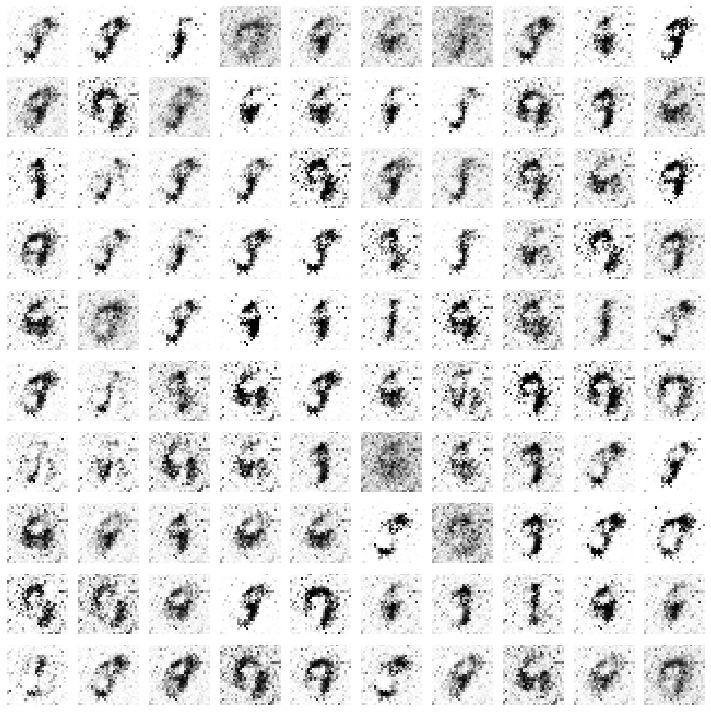

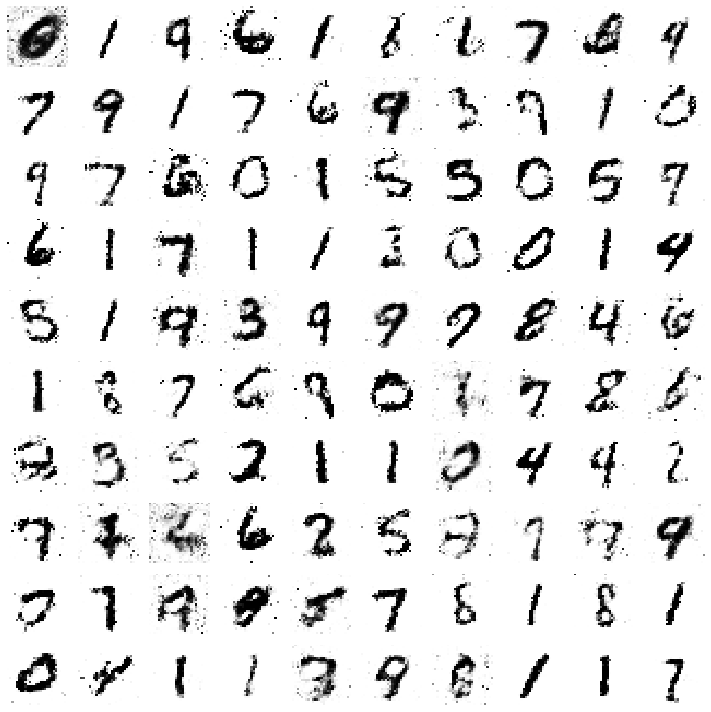

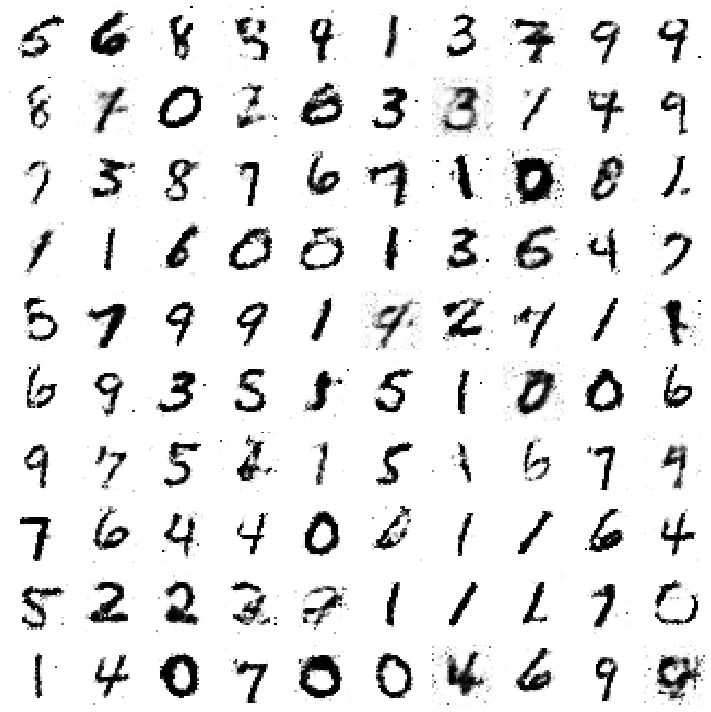

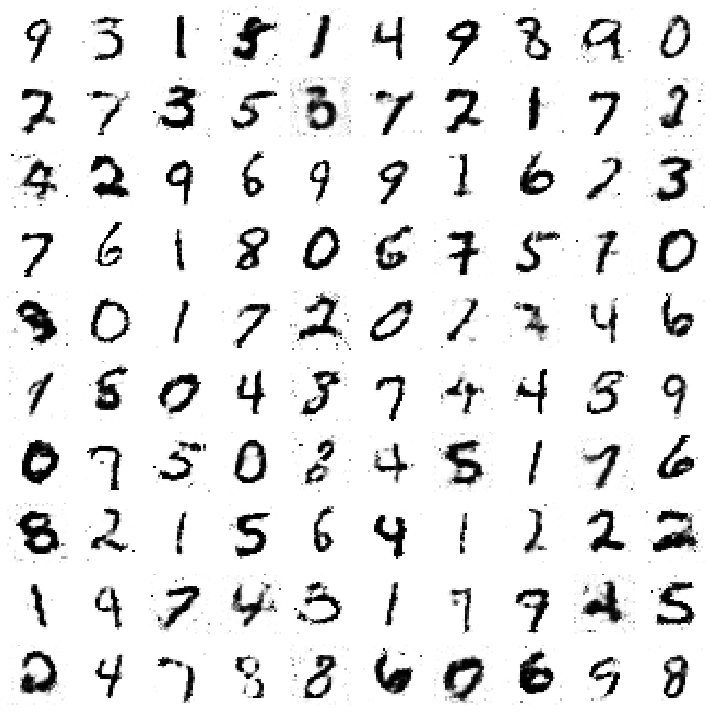

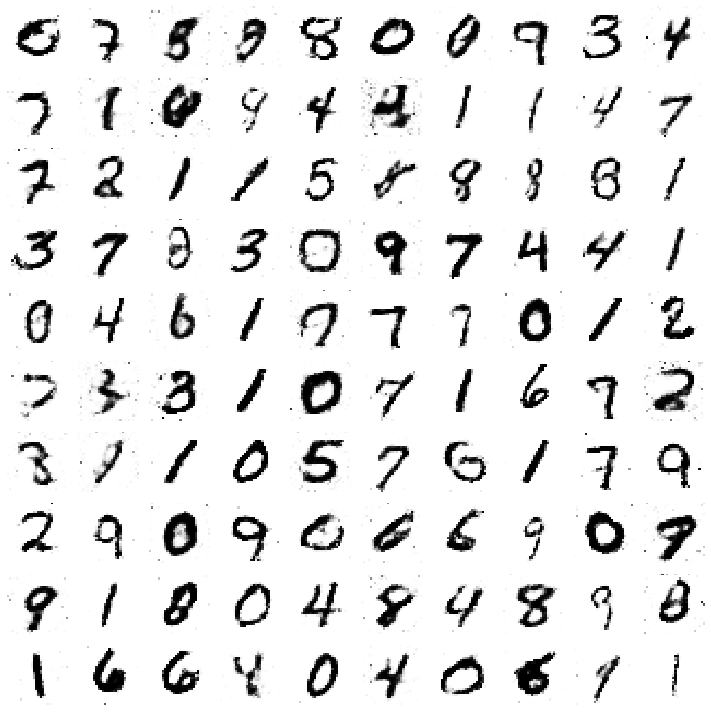

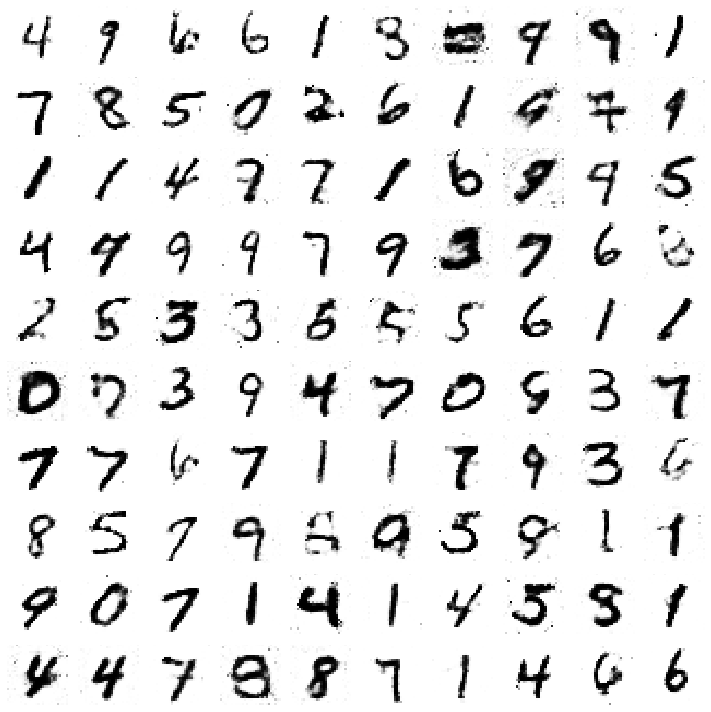

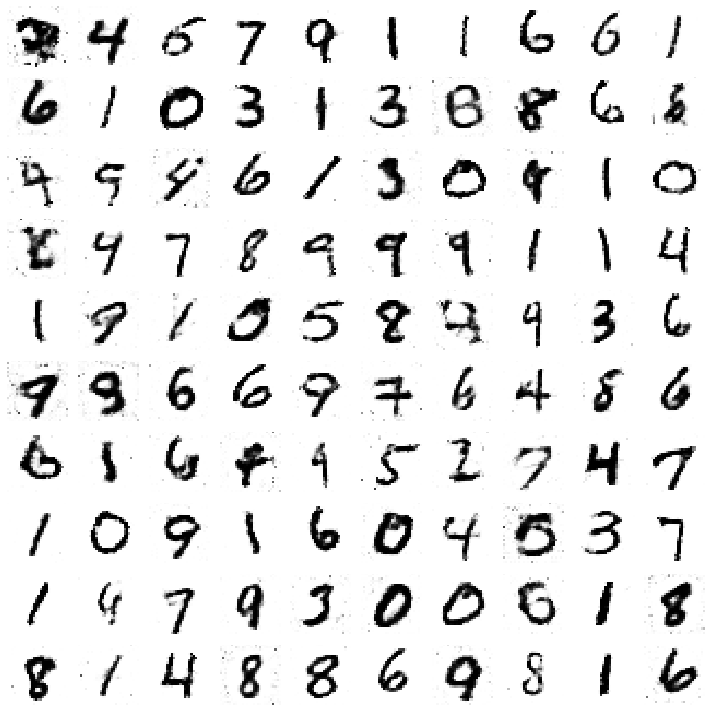

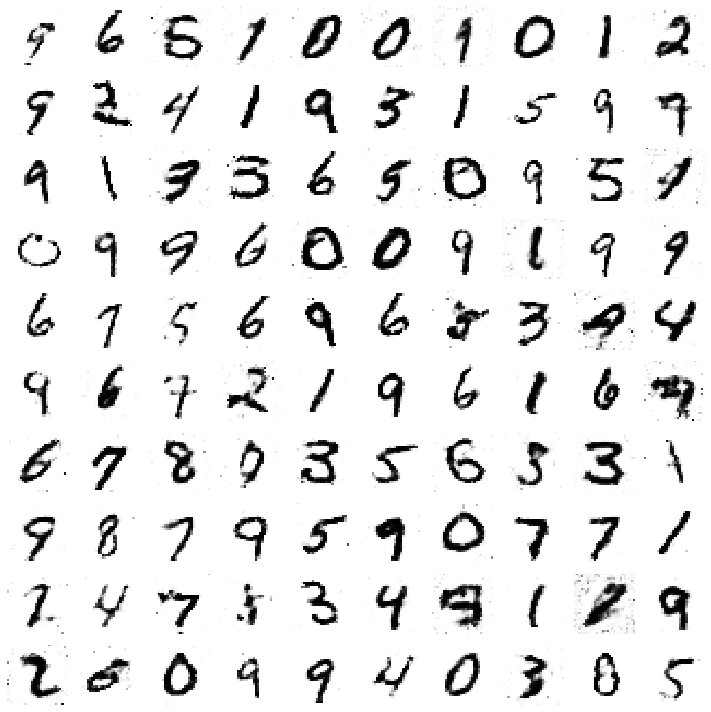

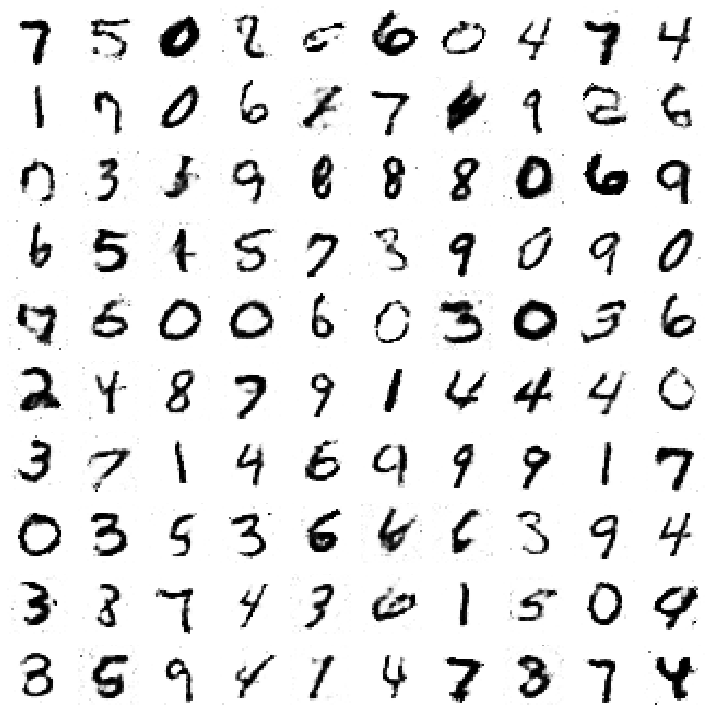

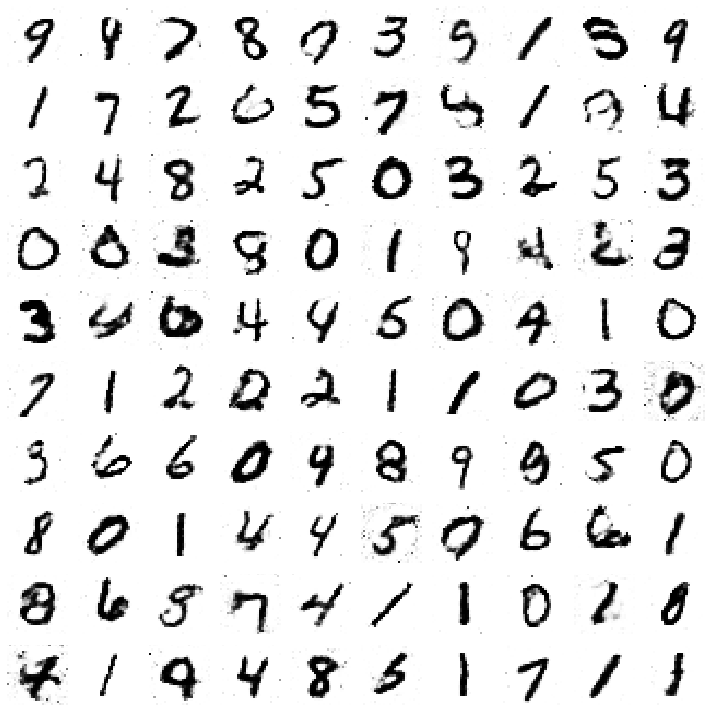

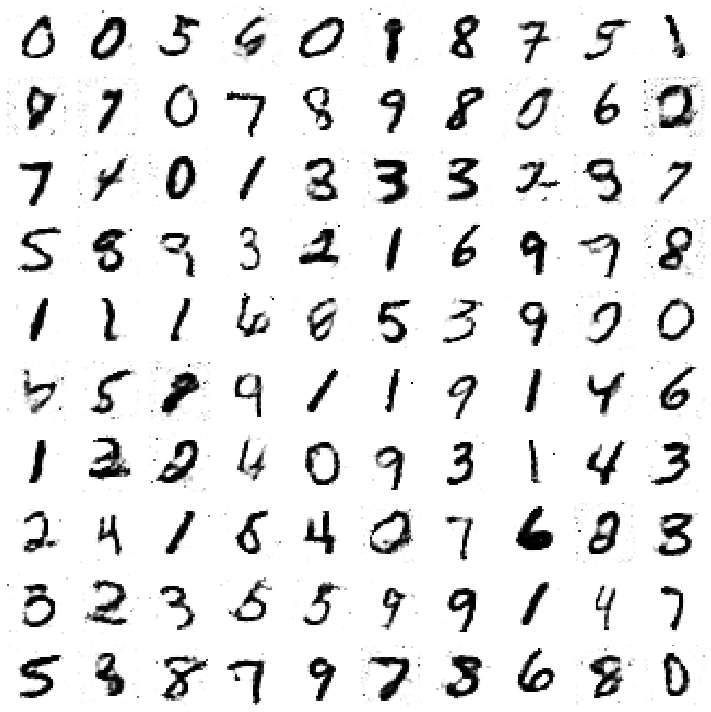

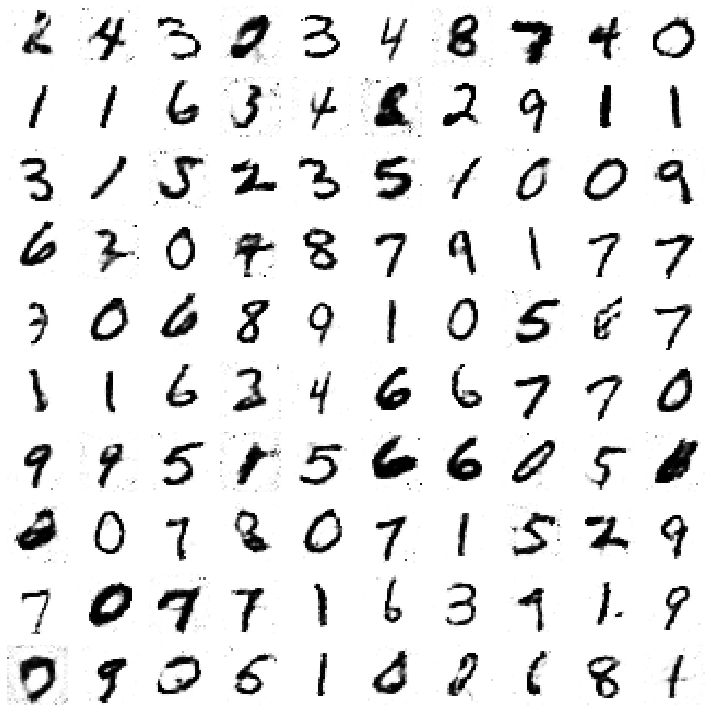

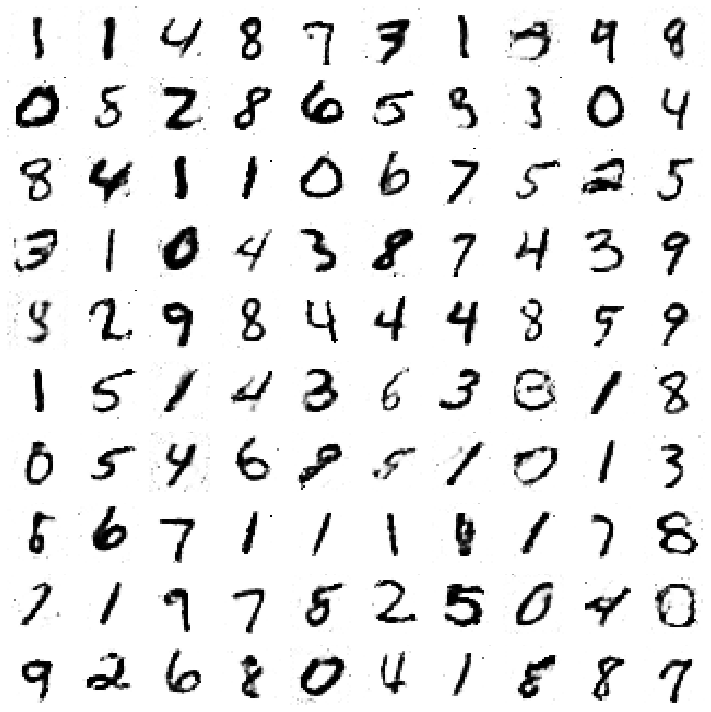

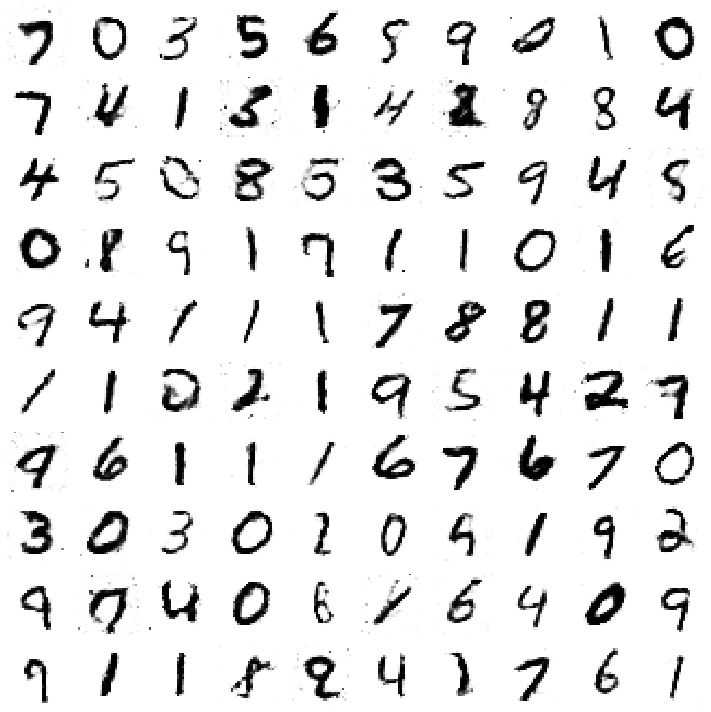

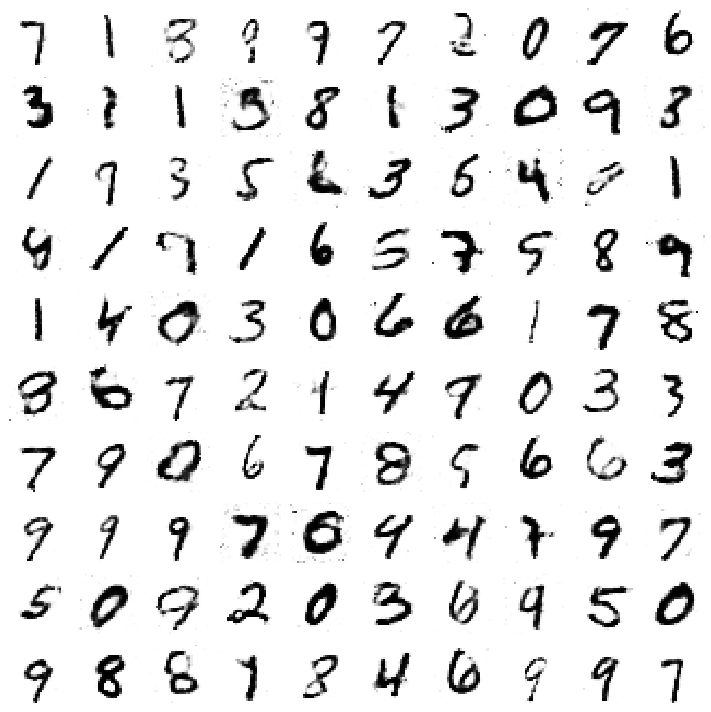

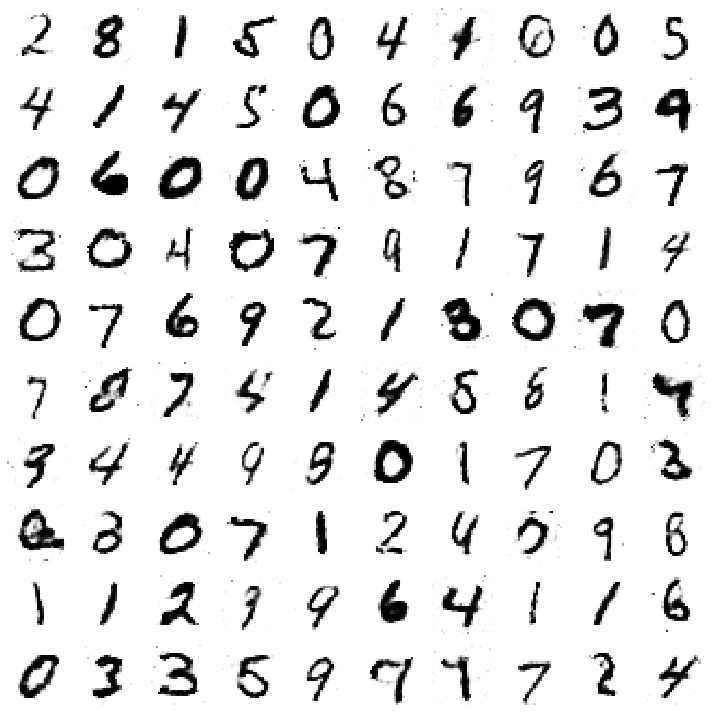

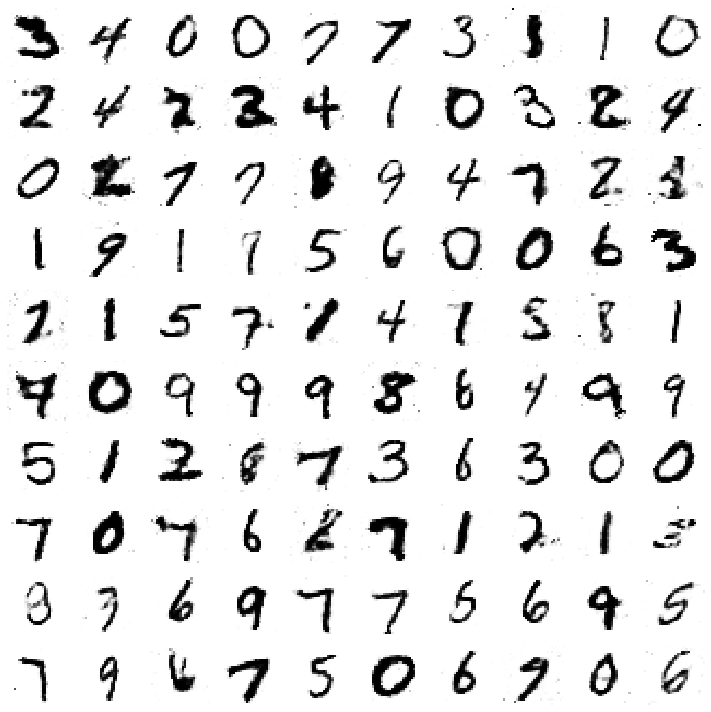

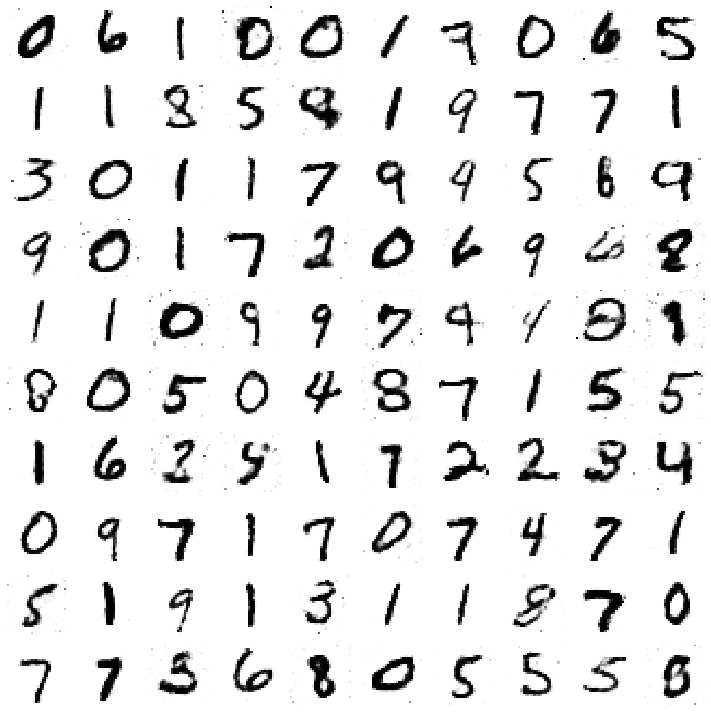

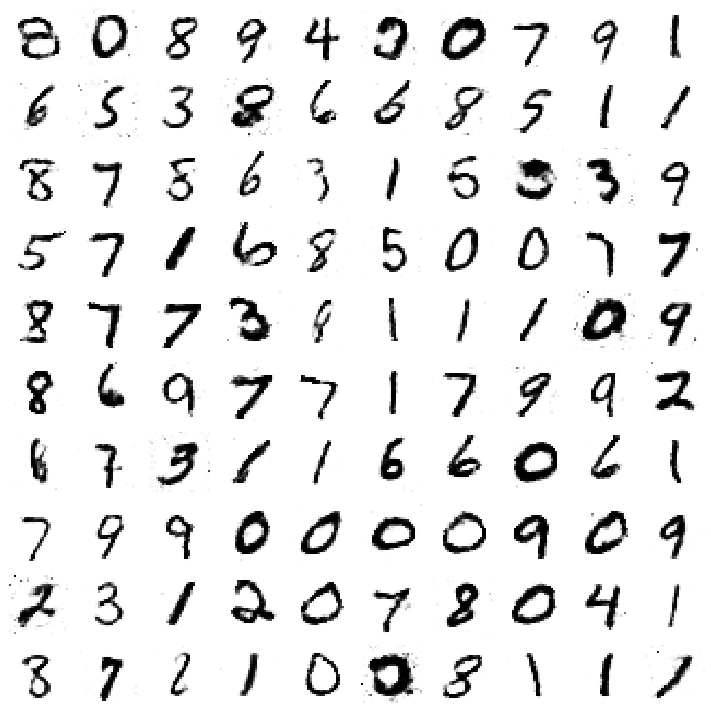

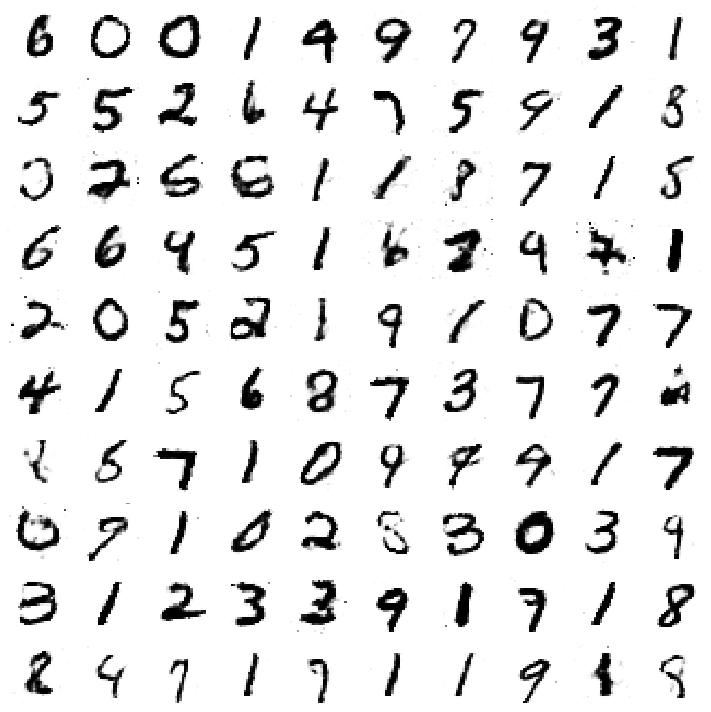

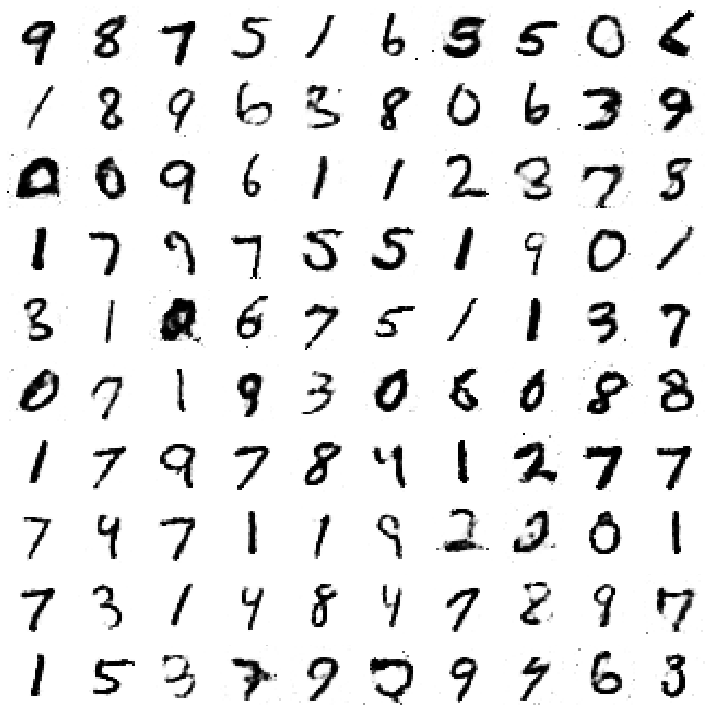

In [ ]:
def train(epochs=1, batch_size=128):
  # train & test Data 가져오기
  x_train, y_train, x_test, y_test = load_mnist_data()

  # train data를 batch size로 나누기
  batch_count = x_train.shape[0] // batch_size

  # GAN NETWORK 만들기
  adam = get_optimizer()
  generator = get_generator(adam)
  discriminator = get_discriminator(adam)
  gan = get_gan_network(discriminator, random_dim, generator, adam)

  for e in range(1, epochs+1):
    print('-'*15, 'Epoch %d' %2, '-'*15)
    for _ in tqdm(range(batch_count)):
      # 입력으로 사용할 random noise & image가져오기
      noise = np.random.normal(0, 1, size=[batch_size, random_dim])

      image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

      # MNIST 이미지를 생성
      generated_images = generator.predict(noise)
      X = np.concatenate([image_batch, generated_images])

      y_dis = np.zeros(2*batch_size)
      y_dis[:batch_size]=0.9

      # Discriminator 학습
      discriminator.trainable = True
      discriminator.train_on_batch(X, y_dis)

      # Generator 학습
      noise = np.random.normal(0,1, size=[batch_size, random_dim])
      y_gen = np.ones(batch_size)
      discriminator.trainable = False
      gan.train_on_batch(noise, y_gen)

    if e == 1 or e % 20 == 0:
      plot_generated_images(e, generator)

if __name__ == '__main__':
  train(400, 128)

In [ ]:
# https://tykimos.github.io/2018/10/10/Understanding_Generative_Adversarial_Nets/